STUDENT PERFORMANCE INDICATOR 

Life cycle of ML projects

-Understanding the problem statement
-data collection
-data checks to perform 
-EDA(exploratory data analysis)
-data pre-processing 
-model training
-choosing best model


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\tanuj\OneDrive\Desktop\MLproject\notebook\data\raw.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

DATASET INFO
-gender:sex of students->(male/female)
-race/ethinicity: ethinicity of students -> (Group A,B,C,D,E)
-parenatl level of education:parents'final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
-lunch:having lunch before test(standard or free/reduced)
-test preparation course:complete or not complete before test
-math score
-reading score
-writing score

DATA CHECKS TO PERFORM-
CHECK-
duplicate,missing values,data type,the number of unique values of each column,statistics of data set,various categories present in the different categorical column

In [5]:
#checking missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#checking statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EXPLORING DATA

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end="")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:     ['none' 'completed']


In [12]:
#define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


 Adding columns for total and average scores

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average score'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['Average score'].count()
writing_full = df[df['writing_score'] == 100]['Average score'].count()
math_full = df[df['math_score'] == 100]['Average score'].count()

print(f"Number of students with full score in reading: {reading_full}")
print(f"Number of students with full score in writing: {writing_full}")
print(f"Number of students with full score in math: {math_full}")

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['Average score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average score'].count()

print(f"Number of students with less than or equal to 20 score in reading: {reading_less_20}")
print(f"Number of students with less than or equal to 20 score in writing: {writing_less_20}")
print(f"Number of students with less than or equal to 20 score in math: {math_less_20}")

Number of students with less than or equal to 20 score in reading: 1
Number of students with less than or equal to 20 score in writing: 3
Number of students with less than or equal to 20 score in math: 4


EXPLORING DATA(VISUALIZATION)

1. Histrogram
2. Kernel Distribution Estimation (KDE)

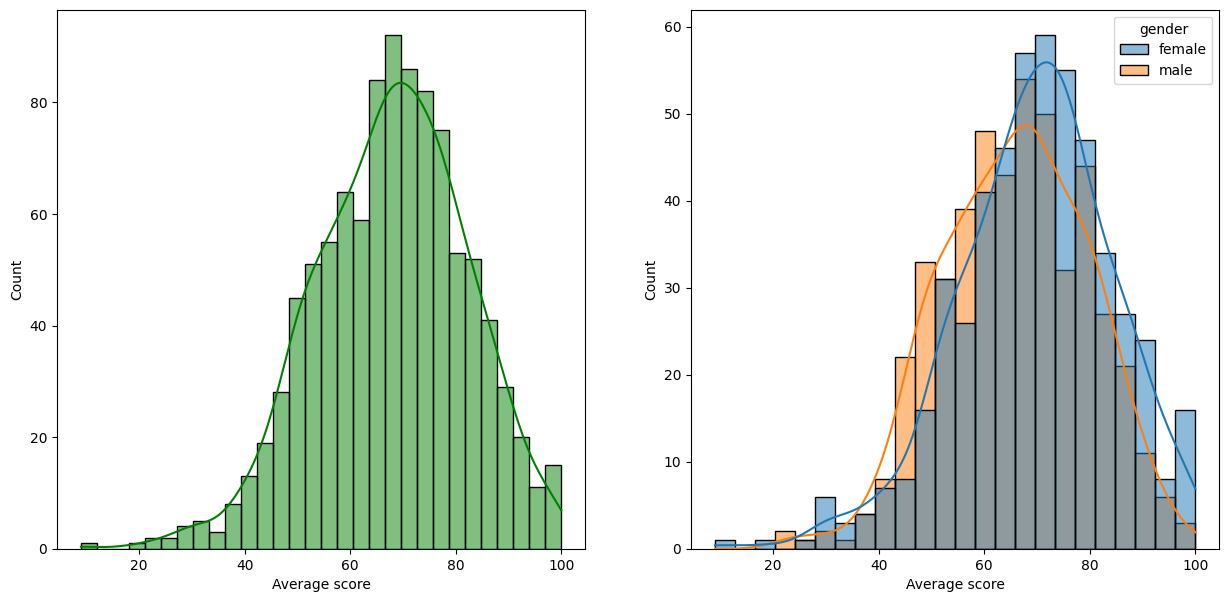

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Average score', kde=True, color='g', bins=30)
plt.subplot(1, 2, 2)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

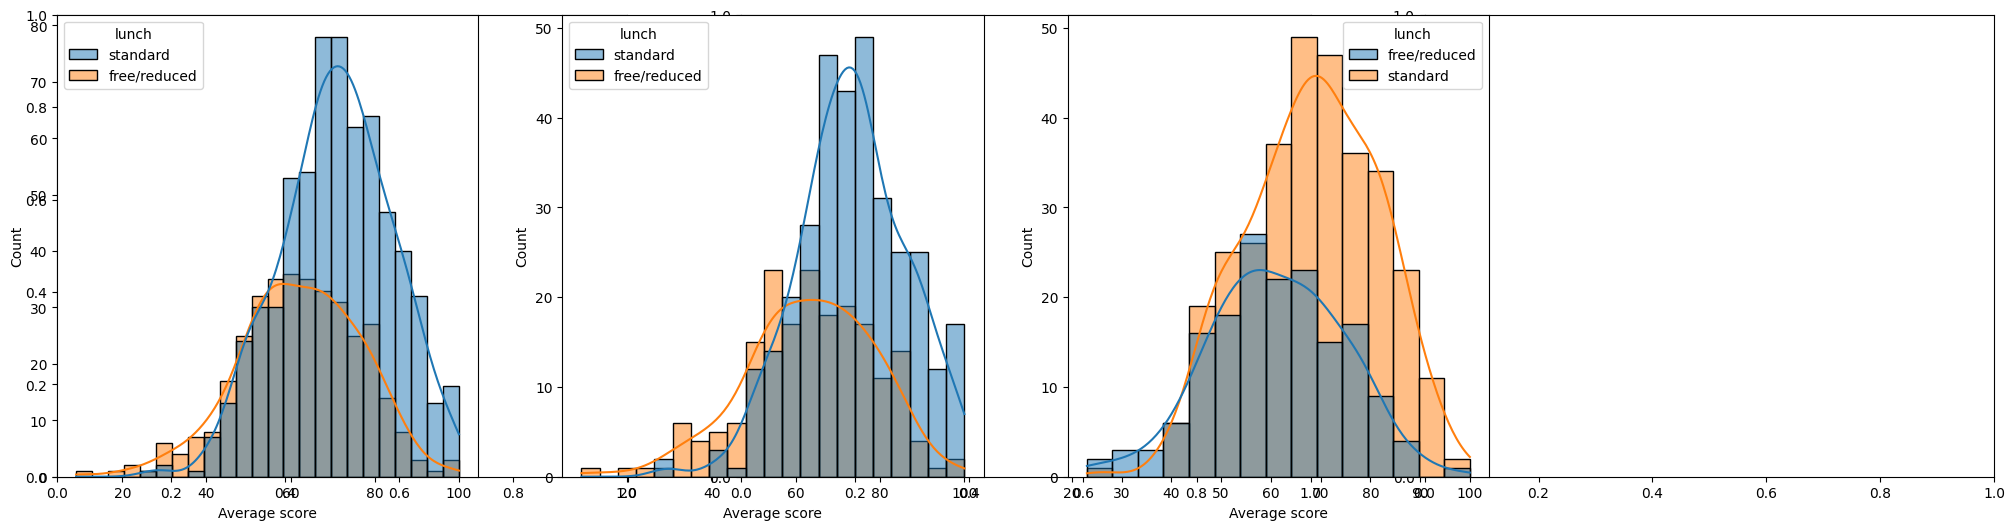

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()